In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os

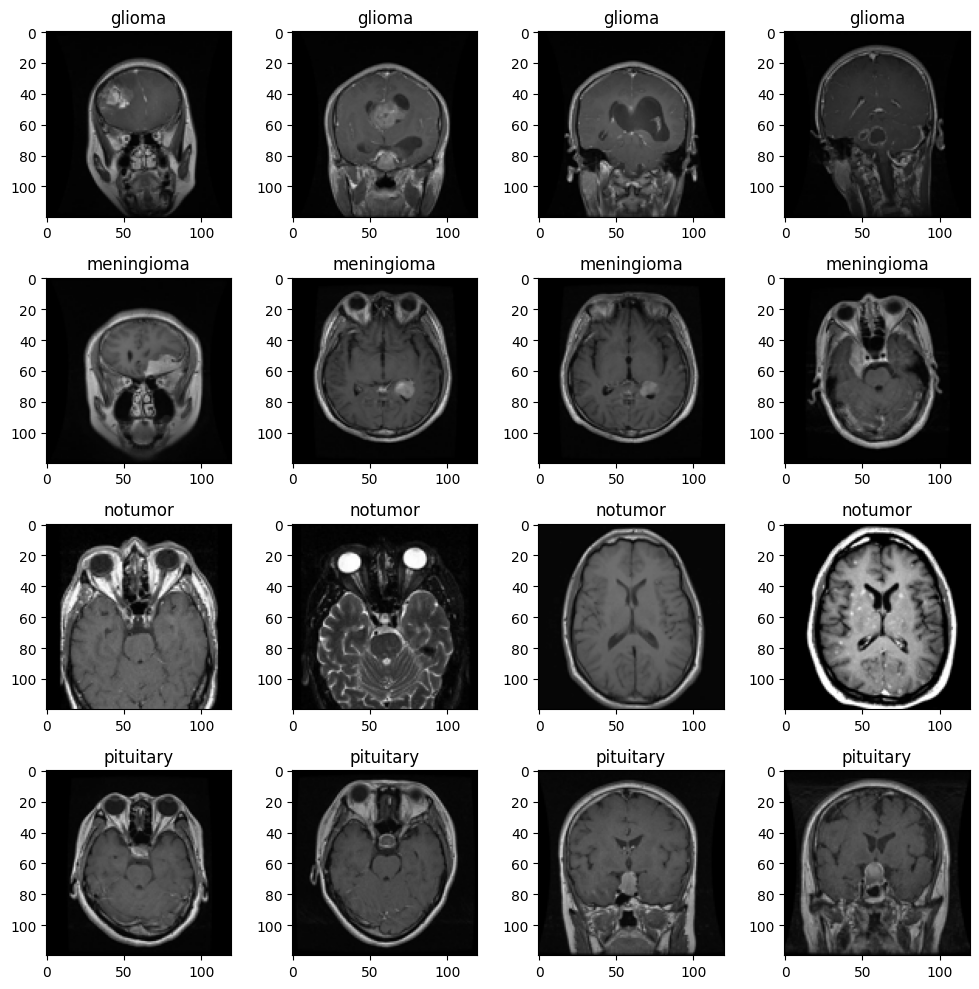

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Parameters
dataset = "/kaggle/input/brain-tumor-mri-dataset/Training"
max_images = 4
image_size = (120, 120)

# Containers
images = []
labels = []

# Load images
for category in sorted(os.listdir(dataset)):
    cat_path = os.path.join(dataset, category)
    if not os.path.isdir(cat_path):
        continue
    count = 0
    for filename in sorted(os.listdir(cat_path)):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.heif')):
            img_path = os.path.join(cat_path, filename)
            try:
                img = Image.open(img_path).convert('RGB').resize(image_size)
                images.append(img)
                labels.append(category)
                count += 1
                if count >= max_images:
                    break
            except Exception as e:
                print(f"Error loading image {filename}: {e}")

# Function to show grid
def grid_show(images, labels, cols=4):
    rows = (len(images) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2.5, rows * 2.5))
    axes = axes.flatten()

    for ax in axes:
        ax.axis('off')

    for i, (img, label) in enumerate(zip(images, labels)):
        axes[i].imshow(img)
        axes[i].set_title(label, fontsize=12)
        axes[i].axis('on')

    plt.tight_layout()
    plt.show()

# Show the images
grid_show(images, labels, cols=4)

In [4]:
import os
from PIL import Image
import numpy as np
from collections import defaultdict

def get_data_info(dataset_path):
    data_info = defaultdict(dict)

    for category in sorted(os.listdir(dataset_path)):
        cat_path = os.path.join(dataset_path, category)
        if not os.path.isdir(cat_path):
            continue

        sizes = []
        channels = []
        image_count = 0

        for filename in os.listdir(cat_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.heif')):
                img_path = os.path.join(cat_path, filename)
                try:
                    with Image.open(img_path) as img:
                        img = img.convert('RGB')  # Ensure 3 channels
                        sizes.append(img.size)  # (width, height)
                        channels.append(len(img.getbands()))
                        image_count += 1
                except Exception as e:
                    print(f"Error loading image {filename}: {e}")

        if image_count > 0:
            avg_width = np.mean([size[0] for size in sizes])
            avg_height = np.mean([size[1] for size in sizes])
            avg_channels = int(np.mean(channels))

            data_info[category]['Total Images'] = image_count
            data_info[category]['Average Size'] = (round(avg_width, 2), round(avg_height, 2))
            data_info[category]['Channels'] = avg_channels
        else:
            data_info[category]['Total Images'] = 0
            data_info[category]['Average Size'] = (0, 0)
            data_info[category]['Channels'] = 0

    return data_info

def display_data_info(info_dict):
    print(f"{'Category':<20} {'Total Images':<15} {'Avg Size (W x H)':<20} {'Channels'}")
    print("-" * 65)
    for category, info in info_dict.items():
        avg_size = f"{info['Average Size'][0]} x {info['Average Size'][1]}"
        print(f"{category:<20} {info['Total Images']:<15} {avg_size:<20} {info['Channels']}")

# Example usage
dataset_path = "/kaggle/input/brain-tumor-mri-dataset/Training"
info = get_data_info(dataset_path)
display_data_info(info)

Category             Total Images    Avg Size (W x H)     Channels
-----------------------------------------------------------------
glioma               1321            512.0 x 512.0        3
meningioma           1339            493.39 x 495.23      3
notumor              1595            313.95 x 320.73      3
pituitary            1457            508.97 x 508.95      3


In [5]:
# remove noise image
def remove_corruptes_images(folder_path):
    removed = 0
    for root,_,files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.heif')):
                file_path = os.path.join(root,file)
                try:
                    img =  Image.open(file_path)
                    img.verify()
                except Exception as e:
                    print(f"corrupted images {file_path} - {e}")
                    os.removes(file_path)
                    removed += 1
    print(f"removed total images:{removed}")
remove_corruptes_images("/kaggle/input/brain-tumor-mri-dataset/Training")

removed total images:0


In [6]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-05-19 21:15:26.487808: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747689326.720668      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747689326.792240      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image normalization + split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% validation
)

# Training data loader
train_generator = datagen.flow_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # or 'binary' if only 2 classes
    subset='training',
    shuffle=True
)

# Validation data loader
val_generator = datagen.flow_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [8]:
# cnn
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,GlobalAveragePooling2D,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam



model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),


    Conv2D(64,(3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    
    Conv2D(128,(3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128,activation = 'relu'),
    Dropout(0.5),
    Dense(4,activation = 'softmax')
])

model.compile(optimizer = Adam(learning_rate = 0.0001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747689340.996272      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1747689340.996949      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,372 (42.61 MB)

 Trainable params: 11,169,924 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
model.fit(train_generator, validation_data = val_generator, epochs = 30)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1747689346.612484      79 service.cc:148] XLA service 0x7b56fc002f00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747689346.613509      79 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1747689346.613535      79 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1747689347.131905      79 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/143 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.1953 - loss: 4.1298  

I0000 00:00:1747689352.953399      79 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


143/143 ━━━━━━━━━━━━━━━━━━━━ 31s 146ms/step - accuracy: 0.6549 - loss: 1.2818 - val_accuracy: 0.3812 - val_loss: 5.6062
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.8272 - loss: 0.4336 - val_accuracy: 0.4408 - val_loss: 2.7317
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.8770 - loss: 0.3087 - val_accuracy: 0.7178 - val_loss: 0.9713
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 0.8820 - loss: 0.2684 - val_accuracy: 0.7257 - val_loss: 0.8011
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9093 - loss: 0.2410 - val_accuracy: 0.7932 - val_loss: 0.7510
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.9151 - loss: 0.1905 - val_accuracy: 0.7835 - val_loss: 0.9344
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9292 - loss: 0.1712 - val_accuracy: 0.8168 - val_loss: 0.7036
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9475 - loss: 0.1326 - val_acc

In [11]:
# evaluate
loss, accuracy = model.evaluate(val_generator)
print(f"test accuracy :{accuracy*100:.2f}%")

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.8250 - loss: 1.4948
test accuracy :82.56%


In [12]:
# Save
model.save('model.h5')